In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Read results csv, break into UEQ & Gemini Principles

In [68]:
# Read the CSV file
df_survey = pd.read_csv("SurveyResponses.csv")

# Split the data into df_ueq and df_gemini
df_ueq = pd.DataFrame()
df_ueq = df_survey.iloc[:, :27]  # First 26 columns

#gemini columns, and rename columns
#df_gemini = pd.DataFrame()
df_gemini = pd.concat([df_survey.iloc[:, [0]], df_survey.iloc[:, 27:35]], axis=1)
df_gemini.columns = ["Participant Id",
  "Public Benefit", "Value", "Built Env Insights",
  "Security", "Openness", "Workflow Integration", "Ownership", "Future Adaptability"
]

### Manipulate UEQ Results

In [69]:
#based official UEQ Data Analysis Tools, which can be found on https://www.ueq-online.org/

#standardize the results so they range from -3 to 3, and 3 always indicates best
# Columns to subtract from 4 (4 - x)
reverse_columns = [3, 4, 5, 9, 10, 12, 17, 18, 19, 21, 23, 24, 25] #1 is good and 7 is bad, so need to reverse (1 becomes 3)
reg_columns = [1, 2, 6, 7, 8, 11, 13, 14, 15, 16, 20, 22, 26] #1 is bad and 7 is good, just subtract 4 (7 becomes 3)

# Apply transformations
df_ueq_transformed = df_ueq.copy()
df_ueq_transformed.iloc[:, reverse_columns] = 4 - df_ueq_transformed.iloc[:, reverse_columns]
df_ueq_transformed.iloc[:, reg_columns] = df_ueq_transformed.iloc[:, reg_columns] - 4

df_ueq_transformed

,Participant Id,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,9c8b7a6d-5e4f-3g2h-1i0j-9k8l7m6n5o4p,1,1,0,3,3,0,2,3,0,...,2,3,3,1,0,3,3,1,2,1
1,b7d8f9e6-3a2c-4d5e-8f7a-1b2c3d4e5f6a,2,1,3,-2,3,3,3,0,2,...,0,2,2,2,0,2,3,3,1,3
2,4f5e6d7c-8b9a-1c2d-3e4f-5g6h7i8j9k0l,2,0,-2,-1,-2,2,3,0,-2,...,0,-2,2,1,1,1,2,2,2,1
3,2a3b4c5d-6e7f-8g9h-0i1j-2k3l4m5n6o7p,2,1,2,2,2,1,2,1,0,...,0,2,2,2,1,2,2,2,2,2
4,7h8g9f0e-1d2c-3b4a-5z6y-7x8w9v0u1t2s,1,2,2,3,2,1,2,0,2,...,0,2,2,1,2,2,2,3,3,0
5,5r6t7y8u-9i0o-1p2q-3r4s-5t6u7v8w9x0y,2,1,2,1,3,1,2,3,3,...,0,1,3,1,1,0,-1,1,1,1
6,3d4e5f6g-7h8i-9j0k-1l2m-3n4o5p6q7r8s,2,1,2,1,3,3,3,1,2,...,2,2,2,2,1,2,1,0,1,2
7,1a2b3c4d-5e6f-7g8h-9i0j-1k2l3m4n5o6p,1,1,2,2,0,1,-1,1,2,...,1,1,1,0,1,0,-2,2,1,0
8,8u9i0o1p-2q3r-4s5t-6u7v-8w9x0y1z2a3b,1,0,-1,1,2,2,2,1,1,...,0,1,1,1,-1,1,-1,-1,-1,1
9,6c7d8e9f-0g1h-2i3j-4k5l-6m7n8o9p0q1r,2,2,2,2,2,2,2,2,1,...,1,2,2,2,2,2,2,2,2,1


In [70]:
#group by categories
attractiveness = [1, 12, 14, 16, 24, 25]
perspicuity = [2, 4, 13, 21]
efficiency = [9, 20, 22, 23]
dependability= [8,11,17,19]
stimulation = [5, 6, 7, 18]
novelty = [3, 10, 15, 26]

df_ueq_summary = pd.DataFrame()
df_ueq_summary['Participant Id'] = df_ueq_transformed['Participant Id']
df_ueq_summary['Attractiveness'] = df_ueq_transformed.iloc[:,attractiveness].mean(axis=1)
df_ueq_summary['Perspicuity'] = df_ueq_transformed.iloc[:,perspicuity].mean(axis=1)
df_ueq_summary['Efficiency'] = df_ueq_transformed.iloc[:,efficiency].mean(axis=1)
df_ueq_summary['Dependability'] = df_ueq_transformed.iloc[:,dependability].mean(axis=1)
df_ueq_summary['Stimulation'] = df_ueq_transformed.iloc[:,stimulation].mean(axis=1)
df_ueq_summary['Novelty'] = df_ueq_transformed.iloc[:,novelty].mean(axis=1)

### Plot Category Means Against Benchmark Results

In [71]:
# mean of each category
product_means = df_ueq_summary.iloc[:, 1:].mean()
product_means

Attractiveness    1.666667
Perspicuity       0.750000
Efficiency        1.250000
Dependability     1.325000
Stimulation       1.700000
Novelty           1.250000
dtype: float64

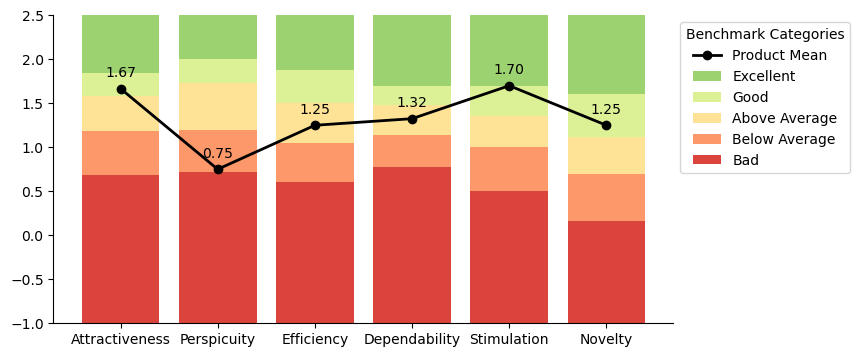

In [ ]:
# plot means agains benchmark Data (also from UEQ data analysis tools)

# Data from benchmark
categories = ["Attractiveness", "Perspicuity", "Efficiency", "Dependability", "Stimulation", "Novelty"]
benchmark = pd.DataFrame({
    "Scale": categories,
    "Bad": [0.69, 0.72, 0.6, 0.78, 0.5, 0.16],
    "Below Average": [0.49, 0.48, 0.45, 0.36, 0.5, 0.54],
    "Above Average": [0.4, 0.53, 0.45, 0.34, 0.35, 0.42],
    "Good": [0.26, 0.27, 0.38, 0.22, 0.35, 0.48],
    "Excellent": [0.66, 0.5, 0.62, 0.8, 0.8, 0.9]
})
benchmark.set_index("Scale", inplace=True)

benchmark["Bad"] = benchmark["Bad"].apply(lambda x: 1+x)  # add one to account for chart starting at -1

# Adjust benchmark data to start at -1
benchmark_adjusted = benchmark.copy()
benchmark_adjusted.iloc[:, 0] -= 1  # Start first category at -1 instead of 0
benchmark_cumsum = benchmark_adjusted.cumsum(axis=1)  # Compute cumulative sums

# Plot settings
fig, ax = plt.subplots(figsize=(8, 4))

# Stacked bar chart
bottoms = [-1] * len(categories)  # Start stacking from -1
colors = ["#D73027", "#FC8D59", "#FEE08B", 
    "#D9EF8B", "#91CF60" ]

for i, col in enumerate(benchmark.columns):
    ax.bar(categories, benchmark[col], bottom=bottoms, color=colors[i], 
           #edgecolor="black", 
           label=col, 
           alpha=0.9
           )
    bottoms = benchmark_cumsum[col]  # Update bottom position for next stack

# Overlay product means as a line plot
x_positions = np.arange(len(categories))
product_values = [product_means[cat] for cat in categories]
ax.plot(x_positions, product_values, marker='o', color='black', linestyle='-', linewidth=2, label="Product Mean")
for i, value in enumerate(product_values):
  ax.text(x_positions[i], value + 0.1, f"{value:.2f}", ha='center', va='bottom', fontsize=10, color='black')

# Set the y-axis limits
ax.set_ylim(-1, max(benchmark_cumsum.max().max(), max(product_means.values) + 0.5))

# Labels and formatting
#ax.set_ylabel("Scale Score")
#ax.set_title("Benchmark Stacked Chart with Product Evaluation Overlay")
ax.set_xticks(x_positions)
#ax.set_xticklabels(categories, rotation=45, ha="right")
handles, labels = ax.get_legend_handles_labels()
order = [labels.index("Product Mean"), labels.index("Excellent"), labels.index("Good"), 
     labels.index("Above Average"), labels.index("Below Average"), labels.index("Bad")]
ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], title="Benchmark Categories", bbox_to_anchor=(1, 1), loc='upper left')

#hide top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

### Plot Gemini Results

In [ ]:
#transform data to be between -3 to 3
df_gemini.set_index("Participant Id", inplace=True)
df_gemini_calibrated = df_gemini-4
df_gemini_calibrated.mean().sort_values(ascending=True)

Ownership              -0.9
Openness                0.4
Security                0.9
Workflow Integration    1.5
Value                   1.6
Public Benefit          1.8
Future Adaptability     1.8
Built Env Insights      2.4
dtype: float64

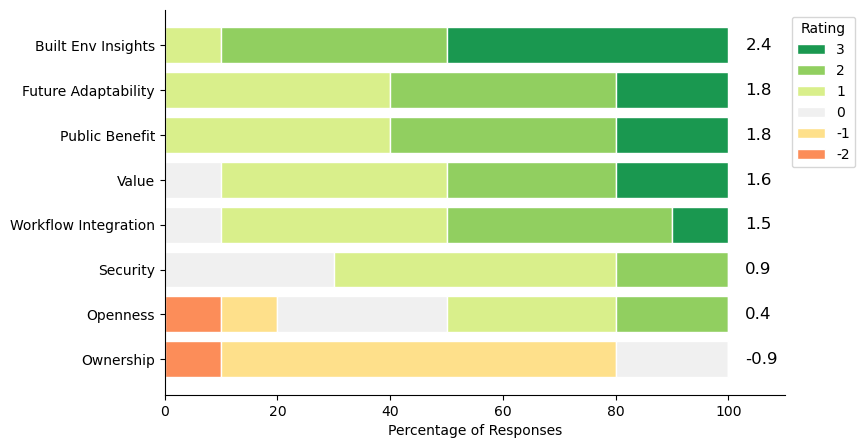

In [ ]:
# Compute mean ratings and sort in descending order
mean_values = df_gemini_calibrated.mean().sort_values(ascending=True)

# Count occurrences of each rating (1-7) for each question
response_counts = df_gemini_calibrated.apply(lambda x: x.value_counts().sort_index()).fillna(0)
response_percentages = response_counts.div(response_counts.sum(axis=0), axis=1) * 100

# Sort response percentages accordingly
response_percentages_sorted = response_percentages[mean_values.index]

# Define colors
colors = {
    -3: "#D73027", -2: "#FC8D59", -1: "#FEE08B", 0: "#F0F0F0",
    1: "#D9EF8B", 2: "#91CF60", 3: "#1A9850"
}

# Set up figure
fig, ax = plt.subplots(figsize=(8, 5))

# Stack bars for each response category
lefts = np.zeros(len(mean_values))  # Track cumulative position
for rating in sorted(response_percentages_sorted.index):  # Ensure order from 1 to 7
    ax.barh(mean_values.index, response_percentages_sorted.loc[rating], left=lefts, 
            color=colors[rating], edgecolor='white', label=str(rating) if rating not in ax.get_legend_handles_labels()[1] else "")
    lefts += response_percentages_sorted.loc[rating]

# Add mean values as markers
for i, (question, mean) in enumerate(mean_values.items()):
    ax.text(103, i, f"{(mean):.1f}", va="center", fontsize=12, color="black")

ax.set_xlim(0, 110)  # Extra space for mean values
ax.set_xlabel("Percentage of Responses")
#ax.set_title("Diverging Stacked Bar Chart of Likert Scale Responses (Sorted by Mean)")
#ax.legend(title="Rating", bbox_to_anchor=(1.02, 1), loc='upper left')
handles, labels = ax.get_legend_handles_labels()
order = [labels.index("3"), labels.index("2"), labels.index("1"), 
     labels.index("0"), labels.index("-1"), labels.index("-2")]
ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], title="Rating", bbox_to_anchor=(1, 1), loc='upper left')


#hide top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

plt.show()


### Ranking of importance

In the final component of the user interviews (open-ended discussion), participants were asked to rank these four categories in importance with regards to what they value in a digital platform for their work:
- Data
- UI
- Analysis
- Engagement

In [80]:
from collections import defaultdict

# rankings from 10 respondents, this can be found in Exploration_And_Guided_Tasks.xlsx
rankings = [
    ["Data", "UI", "Analysis", "Stakeholder Engagement"],
    ["Analysis", "Data", "UI", "Stakeholder Engagement"],
    ["Data", "UI", "Analysis", "Stakeholder Engagement"],
    ["Analysis", "Stakeholder Engagement", "UI", "Data"],
    ["Data", "Stakeholder Engagement", "Analysis", "UI"],
    ["Analysis", "UI", "Stakeholder Engagement", "Data"],
    ["Data", "UI", "Stakeholder Engagement", "Analysis"],
    ["Stakeholder Engagement", "UI", "Data", "Analysis"],
    ["UI = Stakeholder Engagement", "Data", "Analysis"],
    ["Analysis", "Data", "UI", "Stakeholder Engagement"],
]

# Handle ties
for i in range(len(rankings)):
    rankings[i] = [item.strip() for r in rankings[i] for item in r.split("=")]

# Define unique categories
categories = {"Analysis", "Stakeholder Engagement", "UI", "Data"}

# Compute Average Rank Method
rank_sums = defaultdict(list)
for ranking in rankings:
    for rank, category in enumerate(ranking, start=1):
        rank_sums[category].append(rank)

mean_ranks = {category: np.mean(rank_sums[category]) for category in categories}

# Compute Borda Count Method
borda_scores = defaultdict(int)
num_categories = len(categories)

for ranking in rankings:
    for rank, category in enumerate(ranking[::-1], start=1):  # Highest gets most points
        borda_scores[category] += rank

# Sort results
mean_ranks_sorted = sorted(mean_ranks.items(), key=lambda x: x[1])  # Lower is better
borda_scores_sorted = sorted(borda_scores.items(), key=lambda x: x[1], reverse=True)  # Higher is better

mean_ranks_sorted, borda_scores_sorted

([('Data', 2.2),
  ('UI', 2.4),
  ('Analysis', 2.5),
  ('Stakeholder Engagement', 2.9)],
 [('Data', 28), ('UI', 26), ('Analysis', 25), ('Stakeholder Engagement', 21)])

In [81]:
rank_sums

defaultdict(list,
            {'Data': [1, 2, 1, 4, 1, 4, 1, 3, 3, 2],
             'UI': [2, 3, 2, 3, 4, 2, 2, 2, 1, 3],
             'Analysis': [3, 1, 3, 1, 3, 1, 4, 4, 4, 1],
             'Stakeholder Engagement': [4, 4, 4, 2, 2, 3, 3, 1, 2, 4]})

C:\Users\desai\AppData\Local\Temp\ipykernel_38572\4021587831.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(categories)


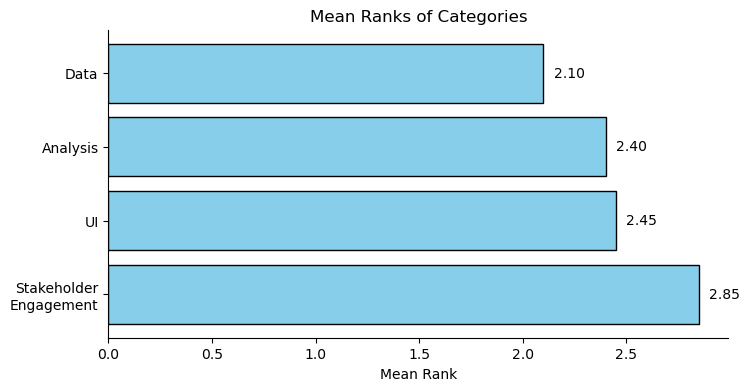

In [17]:
# plot mean ranks
# Extract categories and their mean ranks
categories = [item[0] for item in mean_ranks_sorted]
mean_values = [item[1] for item in mean_ranks_sorted]

# Plot mean ranks
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(categories, mean_values, color='skyblue', edgecolor='black')

# Add labels to bars
for i, v in enumerate(mean_values):
  ax.text(v + 0.05, i, f"{v:.2f}", va='center', fontsize=10)

# Break long category names into multiple lines
categories = [cat.replace("Stakeholder Engagement", "Stakeholder\nEngagement") for cat in categories]
ax.set_yticklabels(categories)

# Formatting
ax.set_xlabel("Mean Rank")
ax.set_title("Mean Ranks of Categories")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.invert_yaxis()  # Highest rank at the top
plt.show()